In [1]:
# 모듈 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# 데이터 로드
raw_data = pd.read_csv('C:/Users/PJH/OneDrive/Python/Example/covid19/data_set_raw.csv')
raw_data.head()

,Unnamed: 0,interval_date,contact_number,necessary,un_necessary,group,individual,overseas,unknown
0,0,1,75,1.0,1.0,0,0,1,0
1,1,4,9,1.0,0.0,0,0,1,0
2,2,10,27,8.0,5.0,0,1,0,0
3,3,8,8,5.0,4.0,1,0,0,0
4,4,1,8,1.0,0.0,0,0,1,0


In [3]:
raw_data = raw_data.drop(['Unnamed: 0'], axis=1)

In [4]:
raw_data.head()

,interval_date,contact_number,necessary,un_necessary,group,individual,overseas,unknown
0,1,75,1.0,1.0,0,0,1,0
1,4,9,1.0,0.0,0,0,1,0
2,10,27,8.0,5.0,0,1,0,0
3,8,8,5.0,4.0,1,0,0,0
4,1,8,1.0,0.0,0,0,1,0


In [5]:
# 스케일 변환
scaler = StandardScaler()
scaled_data = scaler.fit_transform(raw_data)

In [6]:
# Dimension reduction, PCA
pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(data = reduced_data, columns = ['PC1', 'PC2'])

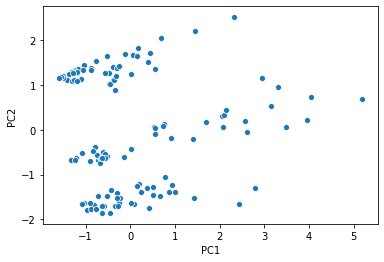

In [7]:
sns.scatterplot(x='PC1', y='PC2', data = pca_data) 
display()

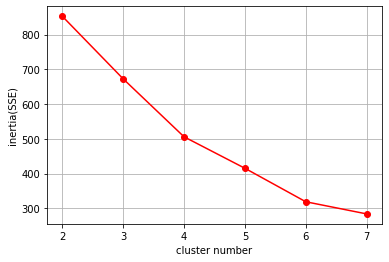

In [8]:
# cluster optimize(elbow law)
inertias = []
k_n = np.arange(2,8,1)
for i in k_n:
    model = KMeans(n_clusters=i)
    model.fit(scaled_data)
    inertias.append(model.inertia_)
plt.figure()
plt.plot(k_n, inertias, 'ro-')
plt.xlabel('cluster number')
plt.ylabel('inertia(SSE)')
plt.grid()

In [9]:
# clustering
model = KMeans(n_clusters=5, random_state=0)
model = model.fit(scaled_data)
prediction = model.predict(scaled_data)
prediction

array([2, 2, 0, 1, 2, 2, 3, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 3, 3, 0, 0, 0,
       3, 0, 1, 0, 3, 3, 3, 3, 3, 1, 3, 1, 0, 0, 0, 1, 0, 3, 0, 1, 0, 2,
       0, 0, 0, 3, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 0, 0,
       3, 2, 3, 3, 1, 4, 1, 1, 2, 1, 1, 1, 0, 0, 2, 3, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 4, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 2, 2])

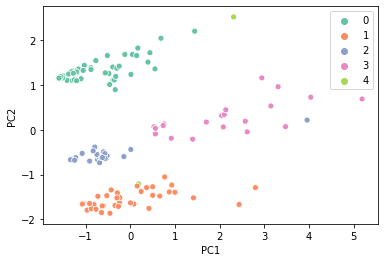

In [10]:
#plotting
sns.scatterplot(x='PC1', y='PC2', hue=prediction, palette="Set2", data=pca_data)
display()

In [11]:
#bad data remove
raw_data['cluster'] = prediction
raw_data

,interval_date,contact_number,necessary,un_necessary,group,individual,overseas,unknown,cluster
0,1,75,1.0,1.0,0,0,1,0,2
1,4,9,1.0,0.0,0,0,1,0,2
2,10,27,8.0,5.0,0,1,0,0,0
3,8,8,5.0,4.0,1,0,0,0,1
4,1,8,1.0,0.0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...
125,1,4,1.0,7.0,0,0,0,1,3
126,2,4,1.0,4.0,0,1,0,0,0
127,1,0,2.0,6.0,0,0,1,0,2
128,11,0,0.0,1.0,0,0,1,0,2


In [12]:
raw_data.groupby(['cluster']).count()

,interval_date,contact_number,necessary,un_necessary,group,individual,overseas,unknown
cluster,,,,,,,,
0,48,48,48,48,48,48,48,48
1,38,38,38,38,38,38,38,38
2,22,22,22,22,22,22,22,22
3,20,20,20,20,20,20,20,20
4,2,2,2,2,2,2,2,2


In [13]:
# 4번 클러스터 확인
raw_data[raw_data['cluster'] == 4]

,interval_date,contact_number,necessary,un_necessary,group,individual,overseas,unknown,cluster
71,41,6,0.0,1.0,1,0,0,0,4
94,48,51,6.0,4.0,0,1,0,0,4


In [14]:
#bad data remove
raw_data.drop([71,94], inplace = True)

In [15]:
#클러스터 리셋
clean_data = raw_data.drop(['cluster'], axis = 1)

In [16]:
clean_data.head()

,interval_date,contact_number,necessary,un_necessary,group,individual,overseas,unknown
0,1,75,1.0,1.0,0,0,1,0
1,4,9,1.0,0.0,0,0,1,0
2,10,27,8.0,5.0,0,1,0,0
3,8,8,5.0,4.0,1,0,0,0
4,1,8,1.0,0.0,0,0,1,0


#### 클린 데이터 기반 Re_clustering

In [17]:
#Scale Transformation
sclaer = StandardScaler()
scaled_clean_data = scaler.fit_transform(clean_data)

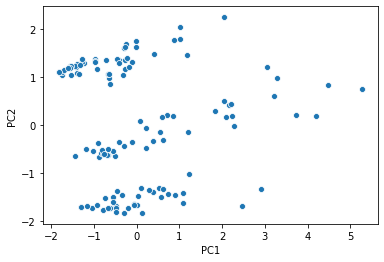

In [18]:
#Dimension reduction, PCA
pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(scaled_clean_data)
pca_data = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2'])

sns.scatterplot(x='PC1', y='PC2', data=pca_data)
display()

In [19]:
#K-means 예측 모델 디자인
model = KMeans(n_clusters=4, random_state=0)
model.fit(scaled_clean_data)
cluster_prediction = model.predict(scaled_clean_data)
cluster_prediction

array([3, 3, 2, 1, 3, 3, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 2,
       0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 3,
       2, 2, 2, 0, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 2, 2,
       0, 3, 0, 0, 1, 1, 1, 3, 1, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 3, 3])

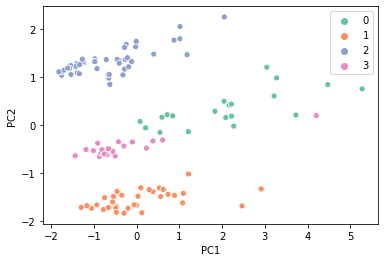

In [20]:
#plotting
sns.scatterplot(x='PC1', y='PC2', hue=cluster_prediction, palette="Set2", data=pca_data)
display()

In [21]:
clean_data['cluster'] = cluster_prediction
clean_data

,interval_date,contact_number,necessary,un_necessary,group,individual,overseas,unknown,cluster
0,1,75,1.0,1.0,0,0,1,0,3
1,4,9,1.0,0.0,0,0,1,0,3
2,10,27,8.0,5.0,0,1,0,0,2
3,8,8,5.0,4.0,1,0,0,0,1
4,1,8,1.0,0.0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...
125,1,4,1.0,7.0,0,0,0,1,0
126,2,4,1.0,4.0,0,1,0,0,2
127,1,0,2.0,6.0,0,0,1,0,3
128,11,0,0.0,1.0,0,0,1,0,3


In [22]:
clean_data.groupby(['cluster']).mean()

,interval_date,contact_number,necessary,un_necessary,group,individual,overseas,unknown
cluster,,,,,,,,
0,4.600000,31.550000,3.850000,7.350000,0.000000,0.000000,0.0,1.000000
1,3.526316,16.210526,2.184211,5.552632,1.000000,0.000000,0.0,0.000000
2,3.500000,9.541667,2.500000,3.666667,0.000000,1.000000,0.0,0.000000
3,3.772727,27.727273,1.863636,3.272727,0.045455,0.045455,1.0,0.045455


In [23]:
#-0그룹: 불필요한 이동이 많고, 감염경로가 불명확하며, 증상 발현 후 늦게 확진된 고위험군(high risk)
#-1그룹: 불필요한 이동이 비교적 많은 집단감염(gruopies)
#-2그룹: 개인간 접촉에 의한 보통의 감염군(common)
#-3그룹: 해외 유입자(overseas)

In [24]:
cluster_labels = []
for x in cluster_prediction:
    if x == 0:
        y = str('High_risk')
    if x == 1:
        y = str('Group_infection')
    if x == 2:
        y = str('Common')
    if x == 3:
        y = str('Overseas')
    cluster_labels.append(y)

In [25]:
cluster_labels[0:5]

['Overseas', 'Overseas', 'Common', 'Group_infection', 'Overseas']

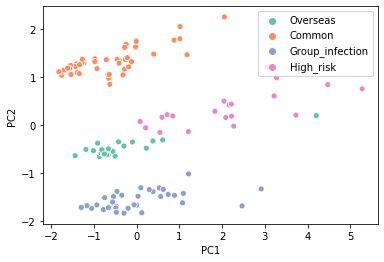

In [26]:
#cluster labeling
sns.scatterplot(x='PC1', y='PC2', hue=cluster_labels, palette="Set2", data=pca_data)
display()